## 라이브러리, 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('./타이타닉/train.csv')
test = pd.read_csv('./타이타닉/test.csv')
print('length of train',len(train))
print('length of test',len(test))

length of train 891
length of test 418


## 데이터 특성 파악 (기초통계량)

In [2]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
num_vars = ['Age','SibSp','Parch','Fare']
fac_vars = ['Survived','Pclass','Sex','Embarked']

In [4]:
train.drop('PassengerId', axis = 1 , inplace = True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [6]:
# train['Survived'] =train['Survived'].astype('object')
train['Pclass'] = train['Pclass'].astype('object')
#Pclass의 타입 변경 (수치형 -> 범주형)
train.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
from scipy.stats import skew, kurtosis

print(skew(train[num_vars]))
print(kurtosis(train[num_vars], fisher=True)) #비모수적 방법
print(kurtosis(train[num_vars], fisher=False))


[       nan 3.68912768 2.74448674 4.77925329]
[        nan 17.77351175  9.71661324 33.20428925]
[        nan 20.77351175 12.71661324 36.20428925]


## train data의 plot

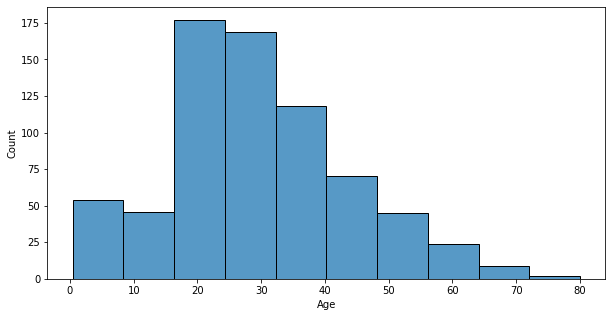

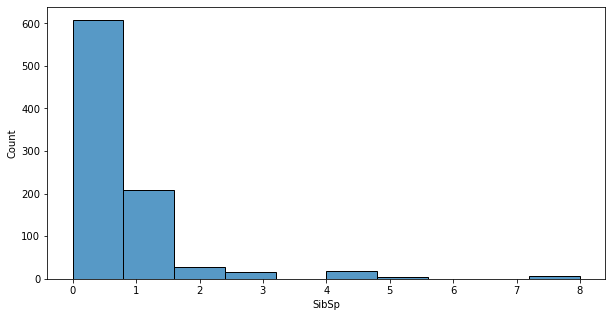

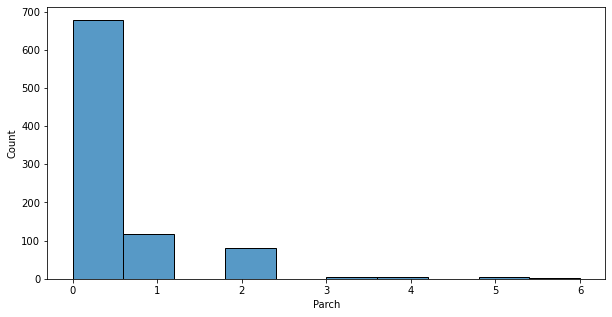

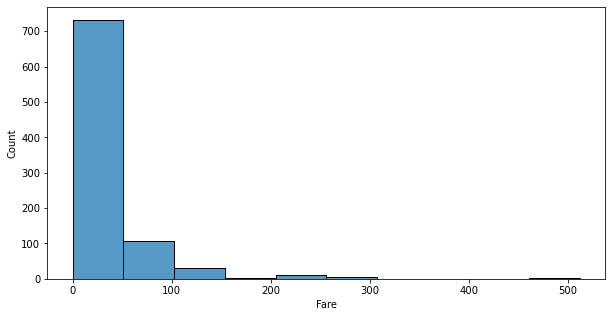

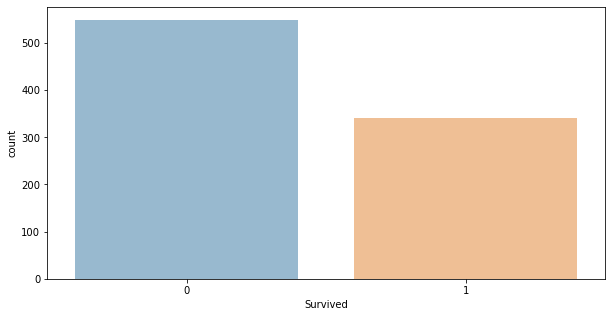

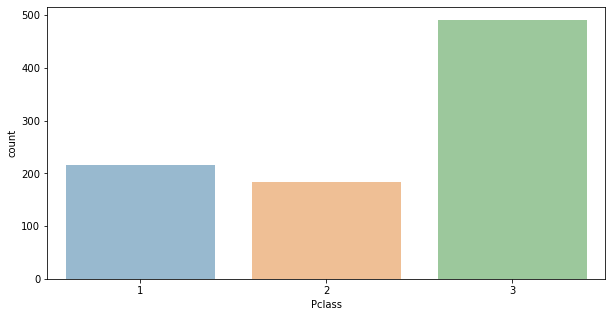

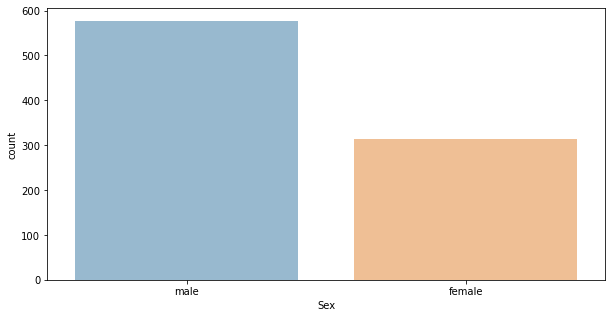

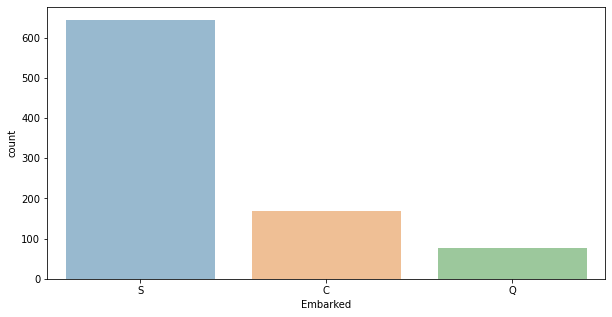

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_plot(col, data, hue=None):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.show()
    
def hist_plot(col, data):
  plt.figure(figsize = (10,5))
  sns.histplot(x = col, data = data, bins = 10)
  plt.show()
    

for col in num_vars :
  hist_plot(col, train)

for col in fac_vars:
    bar_plot(col, train)
    
#수치형 변수인 Age, SibSp, Parch, Fare의 왜도,첨도를 봤을때 치우쳐 진 변수라는것을 볼 수 있다
#plot을 그려보았을때에도 한쪽으로 치우쳐진 것을 볼 수 있다

## train, test 데이터프레임 결합

In [10]:
all_feature = pd.concat((train.iloc[:,2:], test.iloc[:,1:]))
all_feature.isna().sum()
#모든 결측치를 한번에 처리해주기 위해 데이터 프레임 결합
#결측치 확인 결과 Age, Cabin, Embarked, Pclass에서 결측값이 보임
#-> 처리를 어떻게 해줄 것인가??

Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Pclass       891
dtype: int64

## Age 정규화 시켜주기 -> 결측값 대체

In [ ]:
Age_temp = all_feature['Age'].to_numpy()
Age_temp = Age_temp.reshape(-1, 1)

In [177]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(Age_temp)
Age_temp = Scaler.transform(Age_temp)

In [178]:
all_feature['Age'] = Age_temp

## Embarked 결측치 처리

In [179]:
all_feature['Embarked'].value_counts()
#값을 확인 해 보았을 때 S가 가장 많이 나왔으므로 이 값으로 결측치를 처리해준다.

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [180]:
all_feature['Embarked'].fillna('S', inplace = True)
all_feature.fillna(0, inplace = True)
all_feature.isnull().sum()
#나머지 결측치는 0으로 처리

Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Pclass      0
dtype: int64

In [181]:
all_feature.drop('Name', axis = 1, inplace = True)
all_feature

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass
0,male,-0.547050,1,0,A/5 21171,7.2500,0,S,0.0
1,female,0.563552,1,0,PC 17599,71.2833,C85,C,0.0
2,female,-0.269400,0,0,STON/O2. 3101282,7.9250,0,S,0.0
3,female,0.355314,1,0,113803,53.1000,C123,S,0.0
4,male,0.355314,0,0,373450,8.0500,0,S,0.0
...,...,...,...,...,...,...,...,...,...
413,male,0.000000,0,0,A.5. 3236,8.0500,0,S,3.0
414,female,0.632964,0,0,PC 17758,108.9000,C105,C,1.0
415,male,0.598258,0,0,SOTON/O.Q. 3101262,7.2500,0,S,3.0
416,male,0.000000,0,0,359309,8.0500,0,S,3.0


## 원 핫 인코딩(범주형 데이터 인코딩)

In [182]:
all_feature = pd.get_dummies(all_feature, dummy_na=False)
all_feature

,Age,SibSp,Parch,Fare,Pclass,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,-0.547050,1,0,7.2500,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.563552,1,0,71.2833,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.269400,0,0,7.9250,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.355314,1,0,53.1000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.355314,0,0,8.0500,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.000000,0,0,8.0500,3.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
414,0.632964,0,0,108.9000,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
415,0.598258,0,0,7.2500,3.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
416,0.000000,0,0,8.0500,3.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 데이터 분리

In [183]:
X_train = all_feature.iloc[:891,:]
X_test = all_feature.iloc[891:,:]
y_train = train.iloc[:,0]

## 모델링 (RandomForestClassifier)

In [185]:
from sklearn.ensemble import RandomForestClassifier
Random_module = RandomForestClassifier()
Random_module.fit(X_train,y_train)
pred_train=Random_module.predict(X_train)
Random_module.score(X_train, y_train)

0.9988776655443322

In [189]:
submit = pd.read_csv("./타이타닉/submission.csv")
submit['Survived'] = Random_module.predict(X_test)
submit.to_csv('RandomForestClassifier_소연.csv',index=False)